## **Transfer learning VGG 16 and VGG 19 using keras **

In [ ]:
# importing necessary libraries.
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
# re-sizing images.
image_size = [224,224]
train_path ='Datasets/Train'
valid_path = 'Datasets/Test'

In [ ]:
train_path

'Datasets/Train'

In [ ]:
# Import the Rasnet 50 library as shown below and add preprocessing layer to the front of rasnet
# Here we will be using imagenet weights
#include_top will be false because we are going to change the first and last layer.

rasnet = ResNet50(input_shape=image_size +[3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# we are not going to use existing weights.
for layer in rasnet.layers:
  layer.trainable  = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [36]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Datasets/Train/*')

In [37]:
len(folders)

3

In [38]:
#Flattening is the process of converting all the resultant 2 dimensional arrays into a single long continuous linear vector.
# This is probably the last layer.  

x = Flatten()(rasnet.output)

In [39]:
# A dense layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all 
# the neurons in the previous layer, thus densely connected.

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs = rasnet.input, outputs = prediction)

In [40]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [41]:
# tell the model what cost and optimization method to use.
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])


In [43]:
# We are doing Data Augmetation here, to create more images from one image.
train_datagen = ImageDataGenerator(rescale = 1./255,           # scaling down the image(it will be from 0 to 1 pixel.)
                                   shear_range = 0.2,          #proprties
                                   zoom_range  = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)             #scaling down the test data images

In [49]:
# We are going to read images from folder(train).
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Train',
                                                 target_size = (224 ,224),    #Make sure you provide the same target size as initialied for the image size
                                                 batch_size = 32,
                                                 class_mode = 'categorical')    #(categorical) because you have more than 2 classes. if not you can use binary.

Found 64 images belonging to 3 classes.


In [50]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [52]:
# fit the model
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
                    
)

Epoch 1/50
2/2 [==============================] - 25s 12s/step - loss: 6.8025 - accuracy: 0.2812 - val_loss: 6.2259 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 13s 7s/step - loss: 3.2668 - accuracy: 0.3750 - val_loss: 2.2518 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 13s 7s/step - loss: 2.0851 - accuracy: 0.4375 - val_loss: 2.7043 - val_accuracy: 0.1724
Epoch 4/50
2/2 [==============================] - 13s 7s/step - loss: 1.8951 - accuracy: 0.4219 - val_loss: 1.6526 - val_accuracy: 0.3448
Epoch 5/50
2/2 [==============================] - 13s 7s/step - loss: 0.8946 - accuracy: 0.5938 - val_loss: 1.4135 - val_accuracy: 0.5517
Epoch 6/50
2/2 [==============================] - 13s 7s/step - loss: 1.3588 - accuracy: 0.5156 - val_loss: 1.4048 - val_accuracy: 0.3793
Epoch 7/50
2/2 [==============================] - 13s 7s/step - loss: 0.9080 - accuracy: 0.5938 - val_loss: 1.9397 - val_accuracy: 0.3793
Epoch 8/50
2/2 [=================

In [ ]:
The training set is used to train the model, while the validation set is only used to evaluate the model's performance. 
 At the moment your model has an accuracy of ~86% on the training set and ~84% on the validation set.
 This means that you can expect your model to perform with ~84% accuracy on new data.

 Validation set actually can be regarded as a part of training set, because it is used to build your model, neural networks or others. 
 It is usually used for parameter selection and to avoild overfitting. ... 
 Test set is used for performance evaluation.

In [54]:
r.history

{'accuracy': [0.28125,
  0.375,
  0.4375,
  0.421875,
  0.59375,
  0.515625,
  0.59375,
  0.578125,
  0.625,
  0.78125,
  0.71875,
  0.796875,
  0.75,
  0.765625,
  0.796875,
  0.875,
  0.828125,
  0.828125,
  0.78125,
  0.8125,
  0.8125,
  0.890625,
  0.875,
  0.90625,
  0.921875,
  0.921875,
  0.9375,
  0.859375,
  0.9375,
  0.921875,
  0.953125,
  0.890625,
  0.9375,
  0.953125,
  0.8125,
  0.984375,
  0.90625,
  0.90625,
  0.953125,
  0.96875,
  0.921875,
  0.984375,
  0.875,
  0.953125,
  0.9375,
  0.953125,
  0.9375,
  0.953125,
  0.953125,
  0.921875],
 'loss': [6.802465438842773,
  3.2667903900146484,
  2.0850839614868164,
  1.8950577974319458,
  0.8946362733840942,
  1.3588290214538574,
  0.9079628586769104,
  0.9698390960693359,
  0.9023950099945068,
  0.5383280515670776,
  0.7045235633850098,
  0.4943445920944214,
  0.5378977060317993,
  0.4837163984775543,
  0.45072141289711,
  0.44788673520088196,
  0.4085513949394226,
  0.39600035548210144,
  0.5175458788871765,
  0.45828

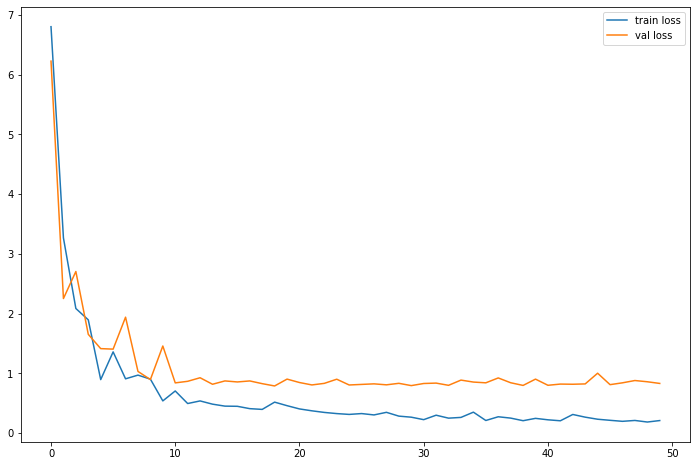

<Figure size 432x288 with 0 Axes>

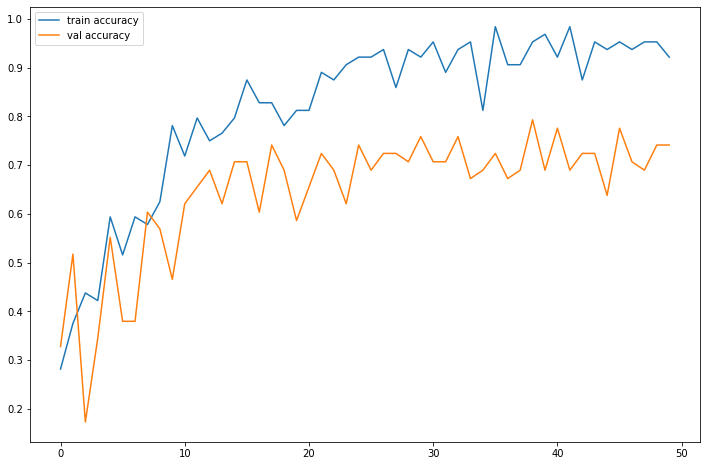

<Figure size 432x288 with 0 Axes>

In [61]:
#plot the loss
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('lossval_loss')

#plot the accuracy
plt.figure(figsize=(12,8))
plt.plot(r.history['accuracy'],label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label = 'val accuracy'
)
plt.legend()
plt.show()
plt.savefig('Accval_accuracy')



In [62]:
#saving the model
from tensorflow.keras.models import load_model
model.save('model_rasnet50.h5')

In [63]:
ypred = model.predict(test_set)

In [64]:
#probability of being that car.
ypred

array([[2.33044904e-02, 2.31092200e-01, 7.45603263e-01],
       [3.85734774e-02, 9.40610707e-01, 2.08158698e-02],
       [2.09869305e-03, 9.61320102e-01, 3.65812071e-02],
       [9.77928340e-02, 2.20260143e-01, 6.81947052e-01],
       [4.72825646e-01, 1.82749450e-01, 3.44424903e-01],
       [1.30409887e-02, 9.59204614e-01, 2.77543999e-02],
       [3.43287028e-02, 2.54245562e-04, 9.65417027e-01],
       [7.09530991e-03, 2.54442483e-01, 7.38462150e-01],
       [2.59464519e-04, 9.94412482e-01, 5.32807736e-03],
       [1.01200370e-02, 9.88609314e-01, 1.27073168e-03],
       [1.85845830e-02, 5.44521399e-03, 9.75970149e-01],
       [2.88329944e-02, 7.28705049e-01, 2.42461890e-01],
       [1.19090620e-02, 2.55701435e-03, 9.85533953e-01],
       [8.54179025e-01, 8.75624418e-02, 5.82585037e-02],
       [1.85813606e-02, 1.59438416e-01, 8.21980298e-01],
       [3.14724296e-02, 1.24353776e-02, 9.56092238e-01],
       [1.45583032e-02, 8.42535496e-01, 1.42906189e-01],
       [4.02122177e-02, 1.14857

In [65]:
# whichever has highest probability we will consider that car as an output.
ypred = np.argmax(ypred,axis=1)

In [66]:
ypred

array([2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2])

In [69]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [70]:
model = load_model('model_rasnet50.h5')

In [72]:
img = image.load_img('/content/drive/My Drive/Datasets/Test/audi/23.jpg',target_size=(224,224))

In [74]:
x = image.img_to_array(img)
x

array([[[171., 171., 171.],
        [173., 173., 173.],
        [180., 180., 180.],
        ...,
        [178., 181., 186.],
        [151., 154., 159.],
        [137., 140., 145.]],

       [[179., 179., 179.],
        [182., 182., 182.],
        [189., 189., 189.],
        ...,
        [201., 204., 209.],
        [169., 172., 177.],
        [145., 148., 153.]],

       [[191., 191., 191.],
        [194., 194., 194.],
        [200., 200., 200.],
        ...,
        [205., 208., 213.],
        [171., 174., 179.],
        [146., 149., 154.]],

       ...,

       [[218., 206., 208.],
        [216., 204., 206.],
        [211., 199., 201.],
        ...,
        [112., 103.,  96.],
        [109., 100.,  93.],
        [109., 100.,  93.]],

       [[220., 208., 210.],
        [218., 206., 208.],
        [212., 200., 202.],
        ...,
        [116., 107., 100.],
        [114., 105.,  98.],
        [114., 105.,  98.]],

       [[220., 211., 212.],
        [218., 209., 210.],
        [211., 2

In [75]:
x.shape

(224, 224, 3)

In [77]:
#scaling the image
x = x/255
x

array([[[0.00262976, 0.00262976, 0.00262976],
        [0.00266052, 0.00266052, 0.00266052],
        [0.00276817, 0.00276817, 0.00276817],
        ...,
        [0.00273741, 0.00278354, 0.00286044],
        [0.00232218, 0.00236832, 0.00244521],
        [0.00210688, 0.00215302, 0.00222991]],

       [[0.00275279, 0.00275279, 0.00275279],
        [0.00279892, 0.00279892, 0.00279892],
        [0.00290657, 0.00290657, 0.00290657],
        ...,
        [0.00309112, 0.00313725, 0.00321415],
        [0.002599  , 0.00264514, 0.00272203],
        [0.00222991, 0.00227605, 0.00235294]],

       [[0.00293733, 0.00293733, 0.00293733],
        [0.00298347, 0.00298347, 0.00298347],
        [0.00307574, 0.00307574, 0.00307574],
        ...,
        [0.00315263, 0.00319877, 0.00327566],
        [0.00262976, 0.00267589, 0.00275279],
        [0.00224529, 0.00229143, 0.00236832]],

       ...,

       [[0.00335256, 0.00316801, 0.00319877],
        [0.0033218 , 0.00313725, 0.00316801],
        [0.00324491, 0

In [78]:
#expanding the dimensions
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [79]:
model.predict(img_data)

array([[0.01121341, 0.12129888, 0.8674877 ]], dtype=float32)

In [80]:
a = np.argmax(model.predict(img_data), axis=1)

In [90]:
if a==1:
  print ('this is audi')
elif a==2:
  print ('this is lamborgini')
else:
  print ('this is mercedes')

this is lamborgini
